In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("demand_prediction_dataset.csv")
df


,product_id,product_name,date,price (INR),promotion,holiday,seasonality
0,P013,Cheese,01-01-2024,268.79,0,0,Winter
1,P005,Shampoo,02-01-2024,288.91,1,0,Summer
2,P004,Soap,03-01-2024,321.93,1,0,Festive
3,P018,Noodles,04-01-2024,423.89,1,0,Festive
4,P010,Juice,05-01-2024,308.73,1,0,Festive
...,...,...,...,...,...,...,...
295,P005,Shampoo,22-10-2024,209.83,1,0,Festive
296,P001,Milk,23-10-2024,126.03,0,0,Summer
297,P019,Ice Cream,24-10-2024,281.10,0,0,Winter
298,P020,Eggs,25-10-2024,215.93,1,0,Festive


In [2]:
# check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    300 non-null    object 
 1   product_name  300 non-null    object 
 2   date          300 non-null    object 
 3   price (INR)   300 non-null    float64
 4   promotion     300 non-null    int64  
 5   holiday       300 non-null    int64  
 6   seasonality   300 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.5+ KB


In [10]:
#preparing the data for machine learning,your date format is "day-month-year" (1-10-2024), and pd.to_datetime() 
#might not be recognizing it correctly. By default, pandas expects "year-month-day" (YYYY-MM-DD) format.so you have define format here

df["date"]=pd.to_datetime(df["date"],format="%d-%m-%Y")
df

,product_id,product_name,date,price (INR),promotion,holiday,seasonality
0,P013,Cheese,2024-01-01,268.79,0,0,Winter
1,P005,Shampoo,2024-01-02,288.91,1,0,Summer
2,P004,Soap,2024-01-03,321.93,1,0,Festive
3,P018,Noodles,2024-01-04,423.89,1,0,Festive
4,P010,Juice,2024-01-05,308.73,1,0,Festive
...,...,...,...,...,...,...,...
295,P005,Shampoo,2024-10-22,209.83,1,0,Festive
296,P001,Milk,2024-10-23,126.03,0,0,Summer
297,P019,Ice Cream,2024-10-24,281.10,0,0,Winter
298,P020,Eggs,2024-10-25,215.93,1,0,Festive


In [12]:
# set date as index for easy accesing the value 

df.set_index(df["date"])
df.sort_values('date')

,product_id,product_name,date,price (INR),promotion,holiday,seasonality
0,P013,Cheese,2024-01-01,268.79,0,0,Winter
1,P005,Shampoo,2024-01-02,288.91,1,0,Summer
2,P004,Soap,2024-01-03,321.93,1,0,Festive
3,P018,Noodles,2024-01-04,423.89,1,0,Festive
4,P010,Juice,2024-01-05,308.73,1,0,Festive
...,...,...,...,...,...,...,...
295,P005,Shampoo,2024-10-22,209.83,1,0,Festive
296,P001,Milk,2024-10-23,126.03,0,0,Summer
297,P019,Ice Cream,2024-10-24,281.10,0,0,Winter
298,P020,Eggs,2024-10-25,215.93,1,0,Festive


In [14]:
# for prophet model , there is no need of one hot encoding and min-max scaler ,becuase it not effect by feature magnitudue
!pip install prophet

In [31]:

df.rename(columns={"price (INR)":"sale"},inplace=True)



# preparing the dat for prophet model

prophet_df=df[["date","sale"]]
#prophet data take datetime as ds input, which we want to predict take it  as y
prophet_df.rename(columns={"date":"ds","sale":"y"},inplace=True)


#applying the model
from prophet import Prophet
import matplotlib.pyplot as plt

#intialisation of model 

model=Prophet(seasonality_mode='multiplicative')

#train the model
model.fit(prophet_df)

                  







C:\Users\amitn\AppData\Local\Temp\ipykernel_9752\1757073185.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df.rename(columns={"date":"ds","sale":"y"},inplace=True)
15:32:27 - cmdstanpy - INFO - Chain [1] start processing
15:32:27 - cmdstanpy - INFO - Chain [1] done processing


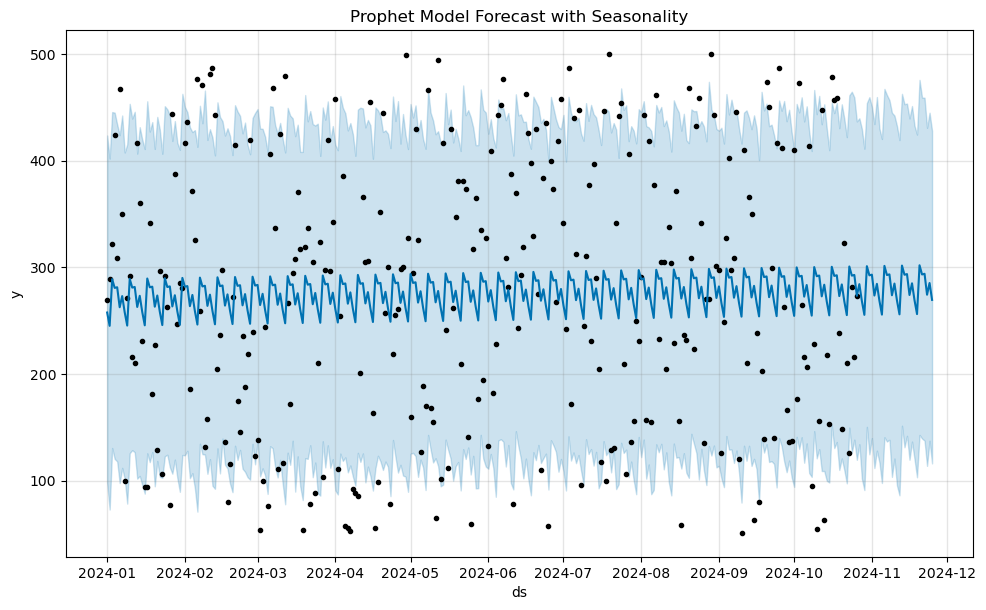

In [34]:
# Create future dataframe for predictions--model need date of next 30 day for prediction , so we create it
future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

 Plot the forecast
model.plot(forecast)
plt.title('Prophet Model Forecast with Seasonality')
plt.show()#


In [6]:
# save this model 
import pickle
with open ("sale_prediction_model.pkl","wb") as f:
    pickle.dump(model,f)

In [2]:
#  deploying modelas  Flask api server 
from flask import Flask, request, jsonify
import pickle
import pandas as pd

In [3]:
app = Flask(__name__)

# Load the saved Prophet model
with open("sale_prediction_model.pkl", "rb") as f:
    model = pickle.load(f)
    
@app.route('/',methods=['GET'])
def home():
    return "Hello, Flask with Prophet!"
    
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Expect JSON input with future dates
    
    future_dates = pd.DataFrame(data["dates"], columns=["ds"])
    forecast = model.predict(future_dates)
    return jsonify(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_dict(orient="records"))

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\amitn\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
print(app.url_map)


Map([<Rule '/static/<filename>' (GET, OPTIONS, HEAD) -> static>,
 <Rule '/' (GET, OPTIONS, HEAD) -> home>,
 <Rule '/predict' (OPTIONS, POST) -> predict>])
